## 📦 Import Required Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind, f_oneway

## 💻 adjusting display settings

In [2]:
pd.options.display.max_columns = 100

## 📊 Load HR Dataset

In [3]:
pd.options.display.max_columns = 100
df = pd.read_csv('reduced_data.csv')
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,YearsSinceLastPromotion,YearsAtCompany
0,49,No,Travel_Rarely,Research & Development,22.0,3.0,5.0,4.0,Divorced,20627.0,3.0,No,4.0,4.0,4.0,0.0,21.0
1,50,No,Travel_Rarely,Research & Development,8.0,3.0,3.0,4.0,Divorced,11947.0,2.0,Yes,4.0,3.0,3.0,0.0,17.0
2,32,No,Travel_Rarely,Research & Development,21.0,4.0,5.0,4.0,Married,24026.0,3.0,Yes,4.0,4.0,3.0,1.0,13.0
3,38,No,Travel_Rarely,Sales,8.0,4.0,3.0,3.0,Divorced,11140.0,1.0,No,4.0,4.0,4.0,0.0,18.0
4,28,Yes,Travel_Frequently,Sales,27.0,1.0,1.0,1.0,Single,3034.0,8.0,Yes,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249632,30,No,Travel_Rarely,Research & Development,14.0,3.0,4.0,4.0,Single,16144.0,3.0,Yes,4.0,4.0,4.0,2.0,9.0
249633,40,No,Travel_Rarely,Research & Development,8.0,4.0,5.0,1.0,Married,21604.0,2.0,No,3.0,4.0,4.0,2.0,18.0
249634,31,No,Travel_Rarely,Research & Development,22.0,4.0,3.0,4.0,Married,11428.0,2.0,No,3.0,4.0,4.0,0.0,10.0
249635,33,No,Travel_Rarely,Research & Development,1.0,1.0,1.0,1.0,Single,2836.0,8.0,No,2.0,1.0,1.0,1.0,1.0


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'JobLevel', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance',
       'YearsSinceLastPromotion', 'YearsAtCompany'],
      dtype='object')

## ℹ️ Display DataFrame Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249637 entries, 0 to 249636
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       249637 non-null  int64  
 1   Attrition                 249637 non-null  object 
 2   BusinessTravel            249637 non-null  object 
 3   Department                249637 non-null  object 
 4   DistanceFromHome          244331 non-null  float64
 5   EnvironmentSatisfaction   249637 non-null  float64
 6   JobLevel                  249637 non-null  float64
 7   JobSatisfaction           249637 non-null  float64
 8   MaritalStatus             249637 non-null  object 
 9   MonthlyIncome             249637 non-null  float64
 10  NumCompaniesWorked        244331 non-null  float64
 11  OverTime                  249637 non-null  object 
 12  PerformanceRating         249637 non-null  float64
 13  RelationshipSatisfaction  249637 non-null  f

## 🔢 Descriptive Statistics

In [6]:
df.describe()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,YearsSinceLastPromotion,YearsAtCompany
count,249637.000000,244331.000000,249637.000000,249637.000000,249637.000000,249637.00000,244331.000000,249637.000000,249637.000000,249637.000000,249637.000000,249637.000000
mean,37.531556,11.897512,3.027464,3.526917,3.028349,15093.44882,3.020943,3.277443,3.024660,3.028998,1.013864,10.234340
std,9.767938,7.783765,1.212652,1.515631,1.212805,8089.61861,2.013587,1.138716,1.213567,1.212571,0.883287,7.449646
min,18.000000,1.000000,1.000000,1.000000,1.000000,2102.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,30.000000,6.000000,2.000000,3.000000,2.000000,8647.00000,2.000000,3.000000,2.000000,2.000000,0.000000,3.000000
50%,36.000000,11.000000,4.000000,4.000000,4.000000,16858.00000,3.000000,4.000000,4.000000,4.000000,1.000000,10.000000
75%,45.000000,17.000000,4.000000,5.000000,4.000000,22153.00000,4.000000,4.000000,4.000000,4.000000,2.000000,15.000000
max,60.000000,29.000000,4.000000,5.000000,4.000000,27977.00000,8.000000,4.000000,4.000000,4.000000,3.000000,30.000000


In [4]:
df.nunique()

Age                            43
Attrition                       2
BusinessTravel                  3
Department                      3
DistanceFromHome               29
EnvironmentSatisfaction         4
JobLevel                        5
JobSatisfaction                 4
MaritalStatus                   3
MonthlyIncome               23647
NumCompaniesWorked              8
OverTime                        2
PerformanceRating               4
RelationshipSatisfaction        4
WorkLifeBalance                 4
YearsSinceLastPromotion         4
YearsAtCompany                 31
dtype: int64

## ✂️ Separate Target and Classify Feature Types

In [7]:
# Cat OR Quant :
x=df.drop('Attrition',axis=1)
y=df['Attrition']

cat = []
quant = []
for col in x.columns:
  if df[col].dtype == 'object':
    cat.append(col)
  else:
    quant.append(col)

## 🔍 Check for Missing Values

In [8]:
df.isnull().sum()

Age                            0
Attrition                      0
BusinessTravel                 0
Department                     0
DistanceFromHome            5306
EnvironmentSatisfaction        0
JobLevel                       0
JobSatisfaction                0
MaritalStatus                  0
MonthlyIncome                  0
NumCompaniesWorked          5306
OverTime                       0
PerformanceRating              0
RelationshipSatisfaction       0
WorkLifeBalance                0
YearsSinceLastPromotion        0
YearsAtCompany                 0
dtype: int64

In [9]:
# if there is null in data we use this code

for col in cat:
    df[col] = df[col].fillna(df[col].mode()[0])
    
for col in quant:
    df[col] = df[col].fillna(df[col].median())

## 🗑 Remove Duplicate Rows

In [10]:
#####################
df.duplicated().sum()

2

In [11]:
#If Exist
df = df.drop_duplicates()

## EDA


**Goal:** The primary goal of EDA is to understand the dataset before we begin any formal modeling. It's a critical first step for:

* Spotting errors and outliers.
* Understanding the structure and data types of our features.
* Analyzing the distribution of key variables (using plots like **histograms** and **box plots**).
* Identifying patterns and relationships between variables (using **scatter plots** and correlation heatmaps).
* Forming initial hypotheses that will guide our feature engineering and model selection.

### 🎨 Styling our charts

In [12]:
plt.style.use('dark_background')

custom_palette = {
    "Yes": "#E60026",  # A strong, bright "metallic" red
    "No": "#CABBBB"    # A dark, neutral grey
}

colors_list = ["#2C3E50", "#E60026"] ############

### 🥧Pie Chart of Attrition

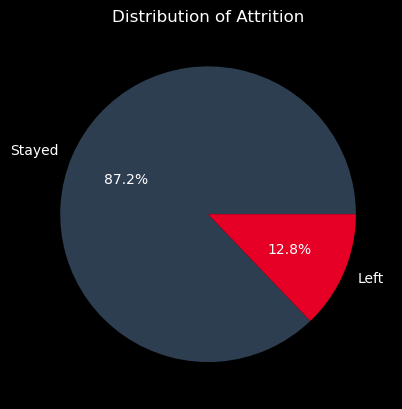

In [13]:
plt.pie(df['Attrition'].value_counts().values, labels= ['Stayed', 'Left'], autopct='%1.1f%%', colors = colors_list)
plt.title('Distribution of Attrition')
plt.show()

### 📊Histograms helps see distribution of our data

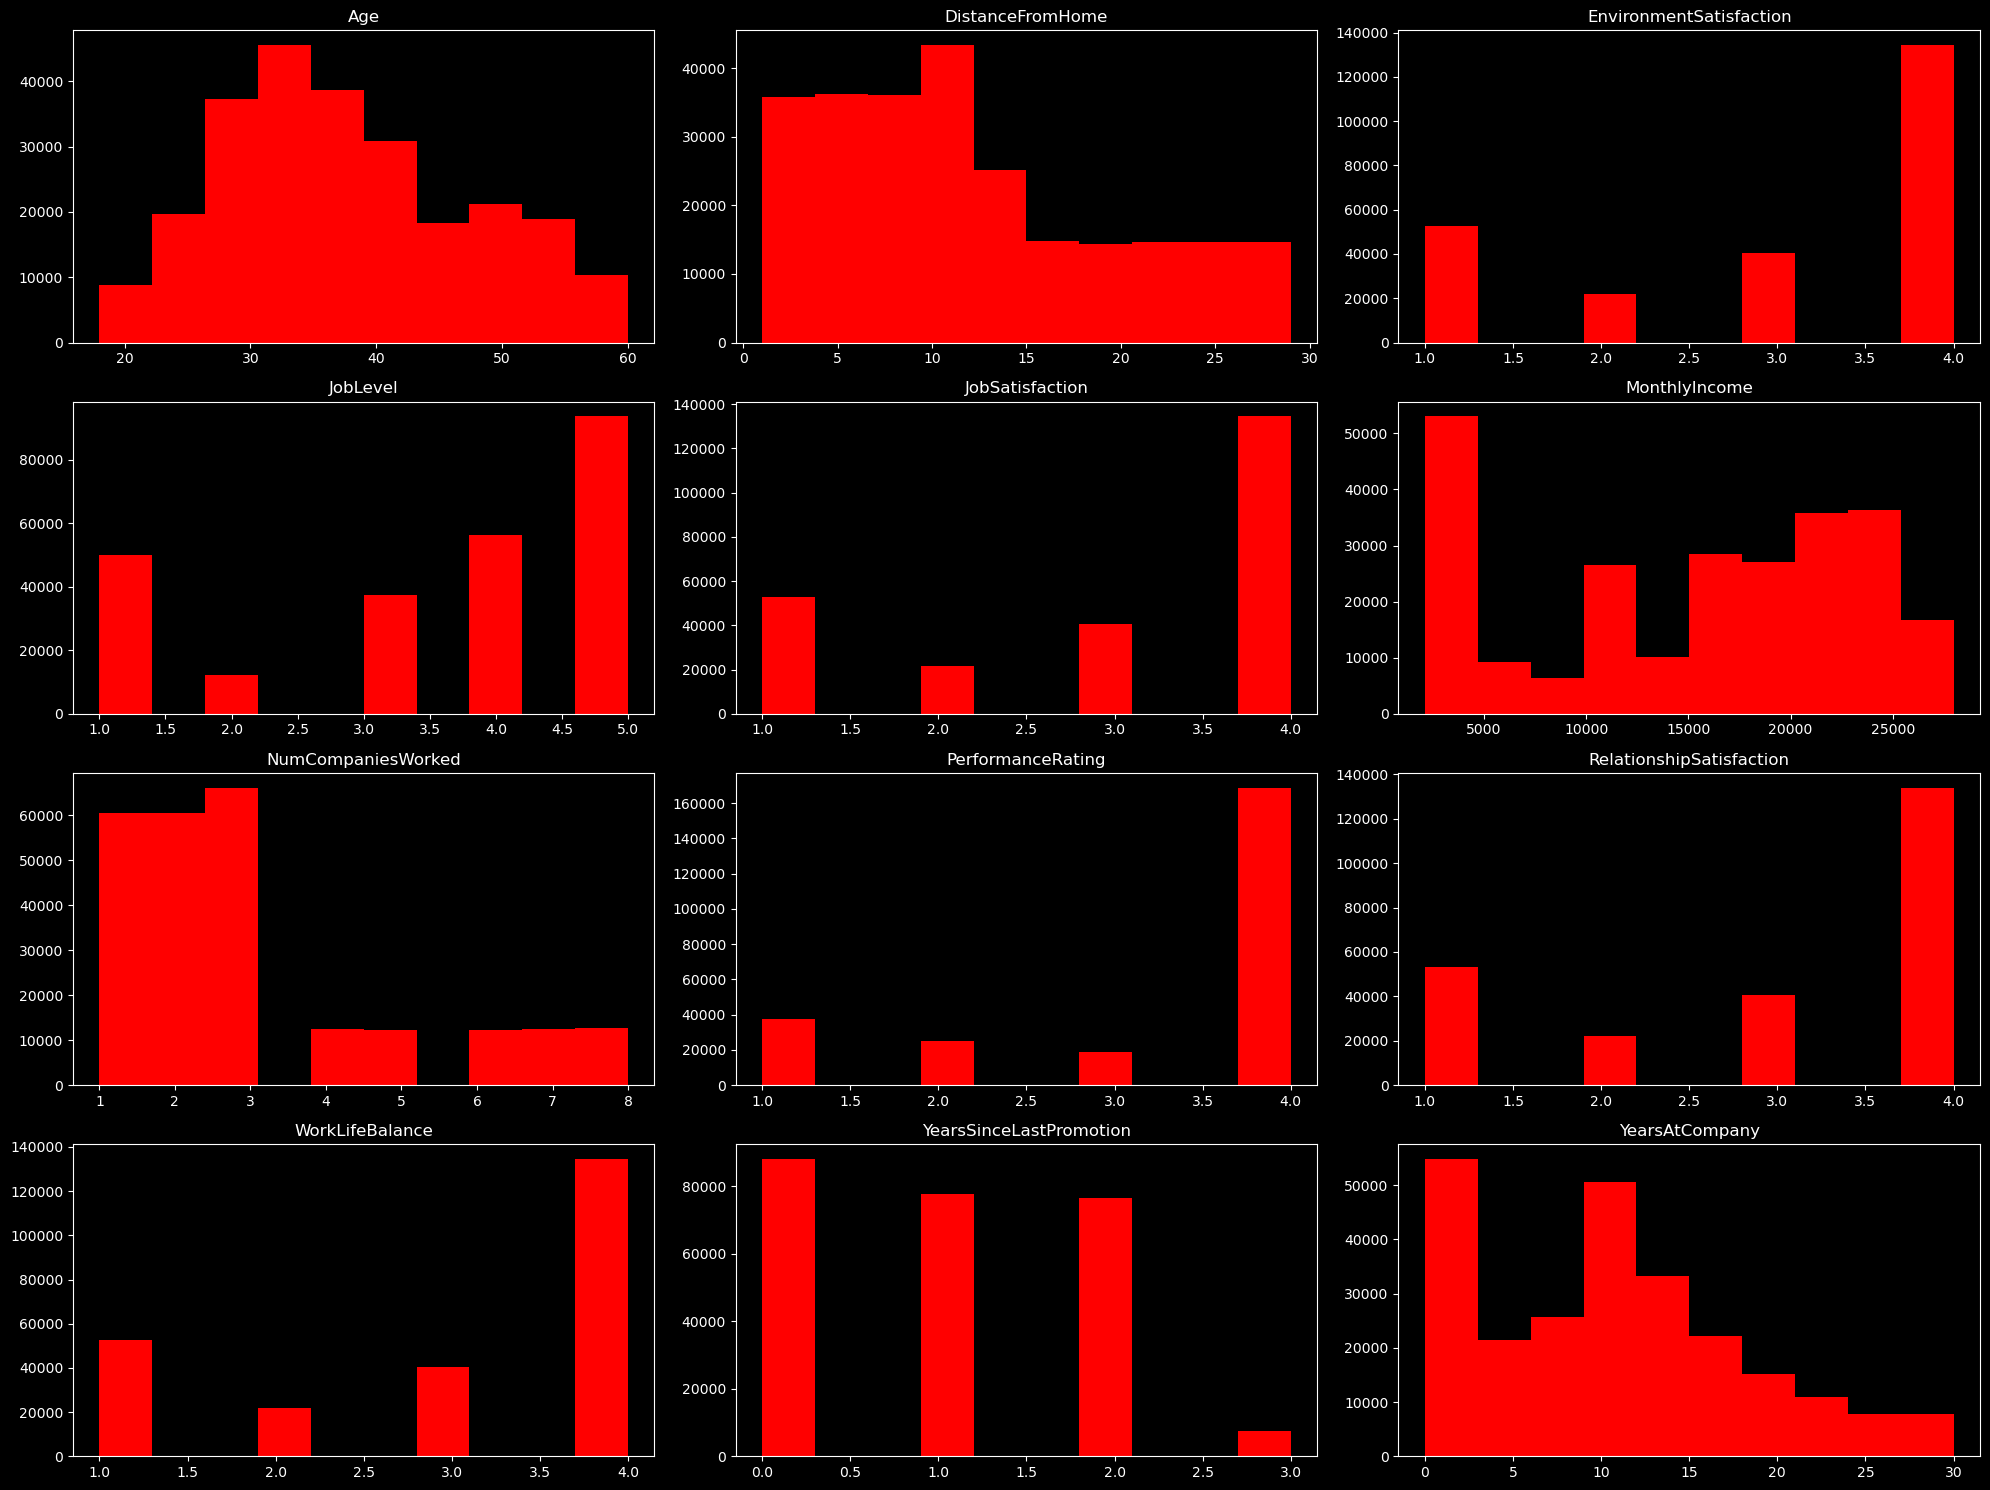

In [14]:
df.hist(figsize=(20,15), color = 'red', grid=0)
plt.tight_layout()

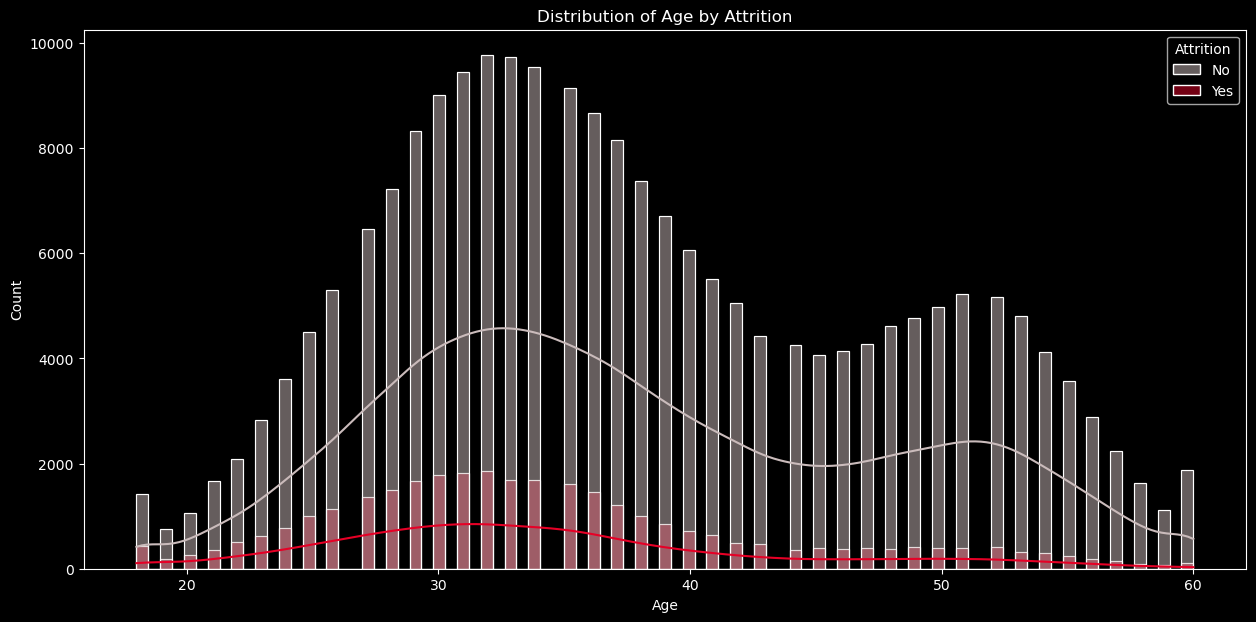

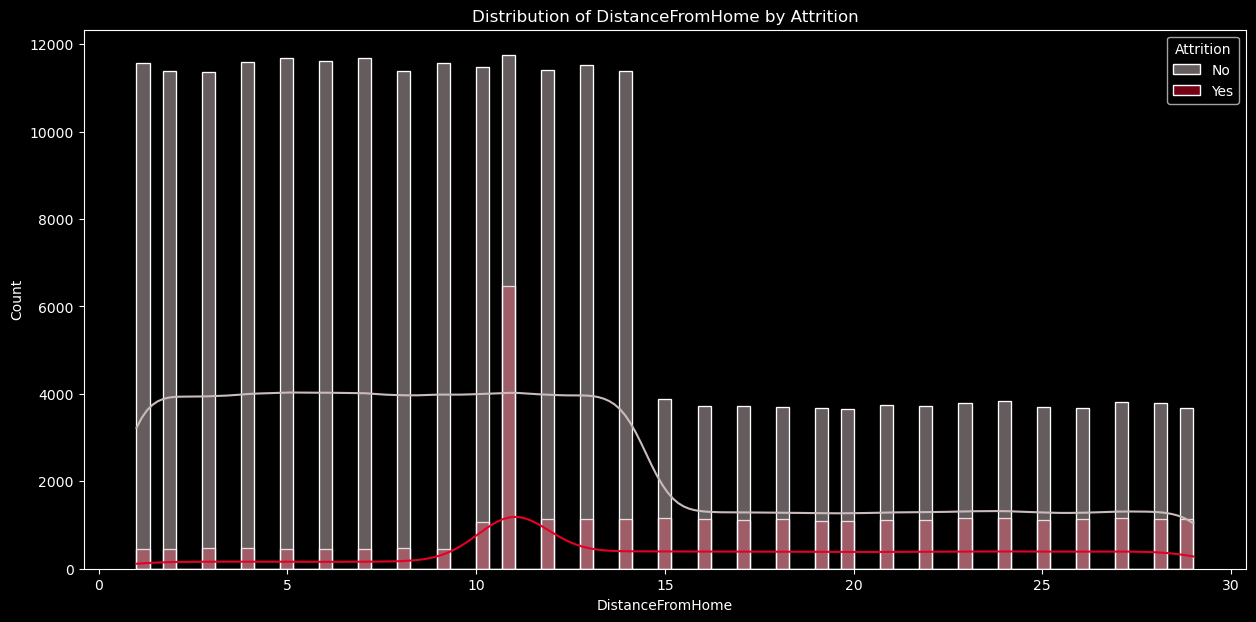

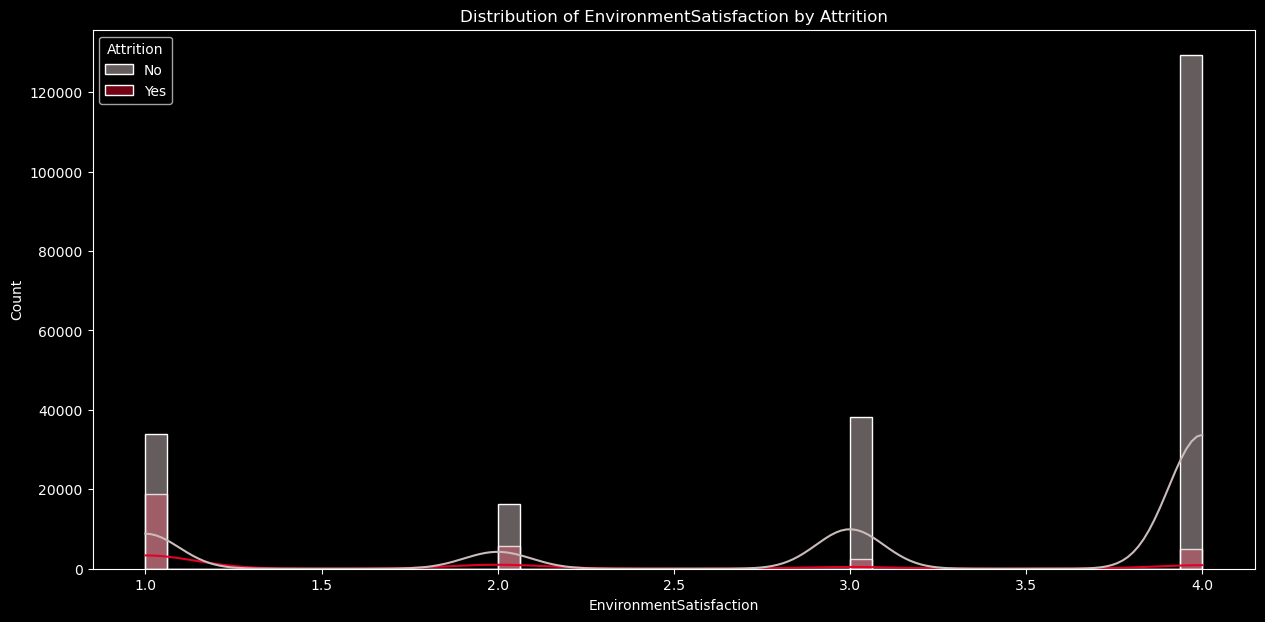

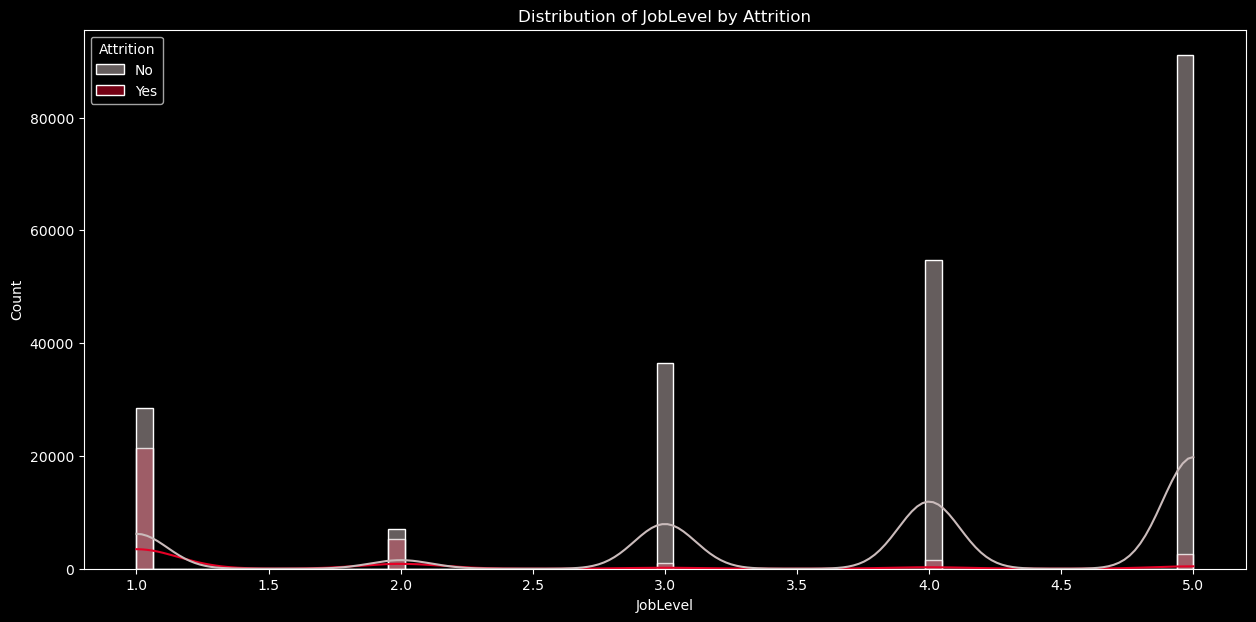

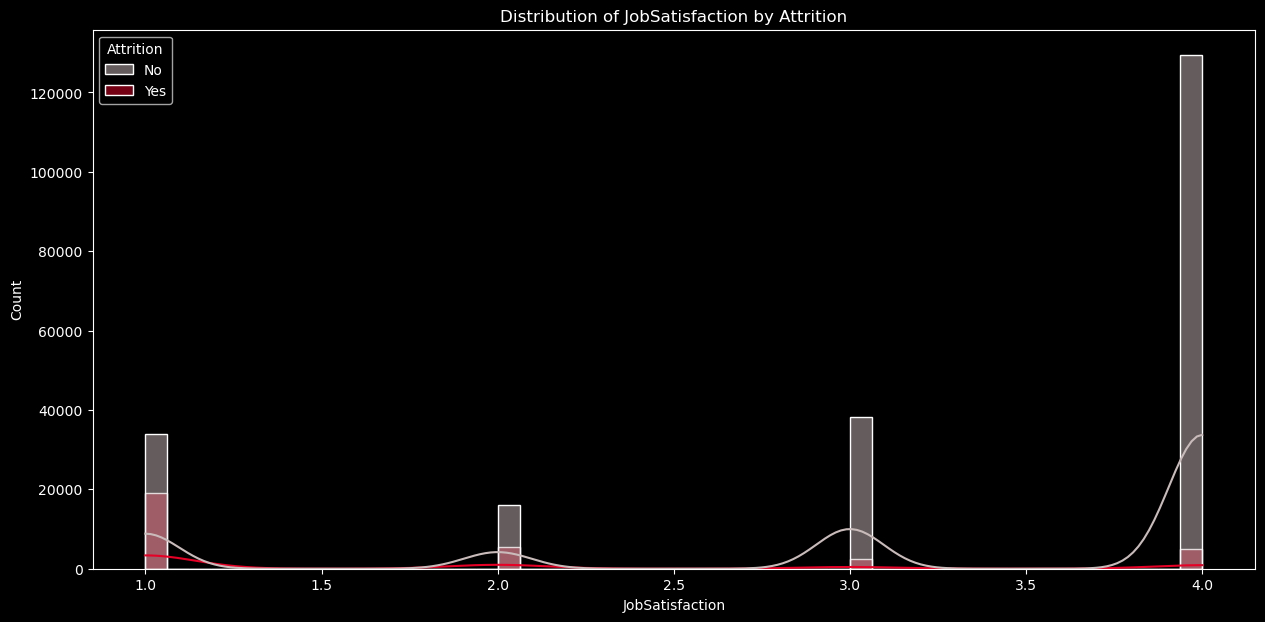

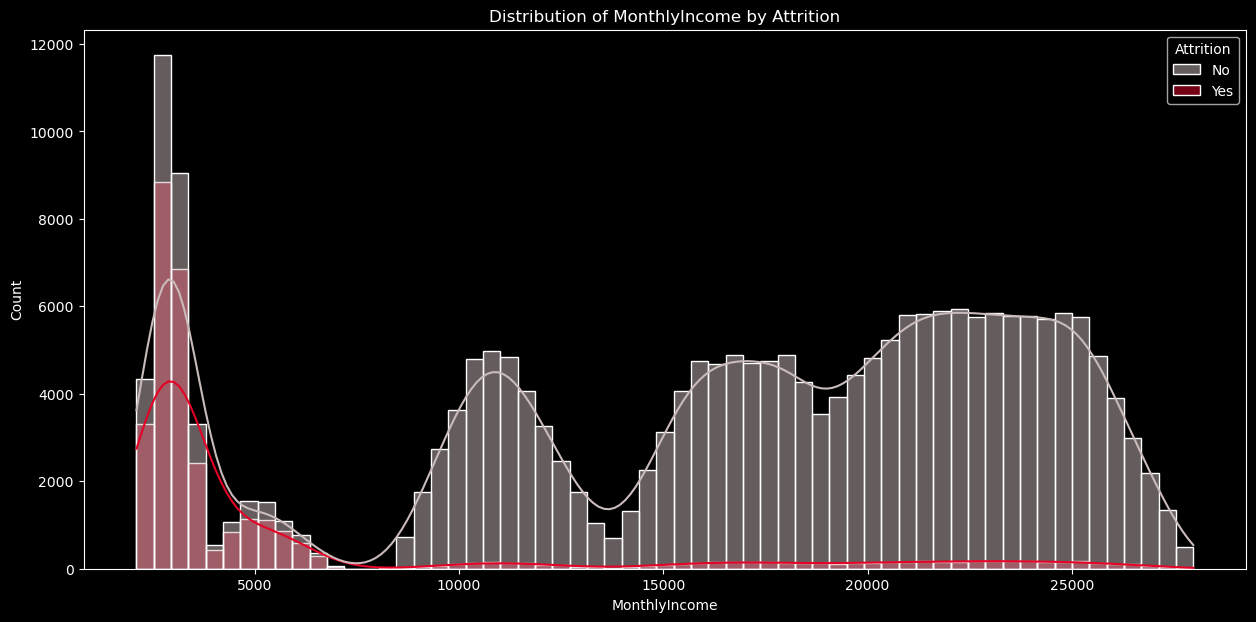

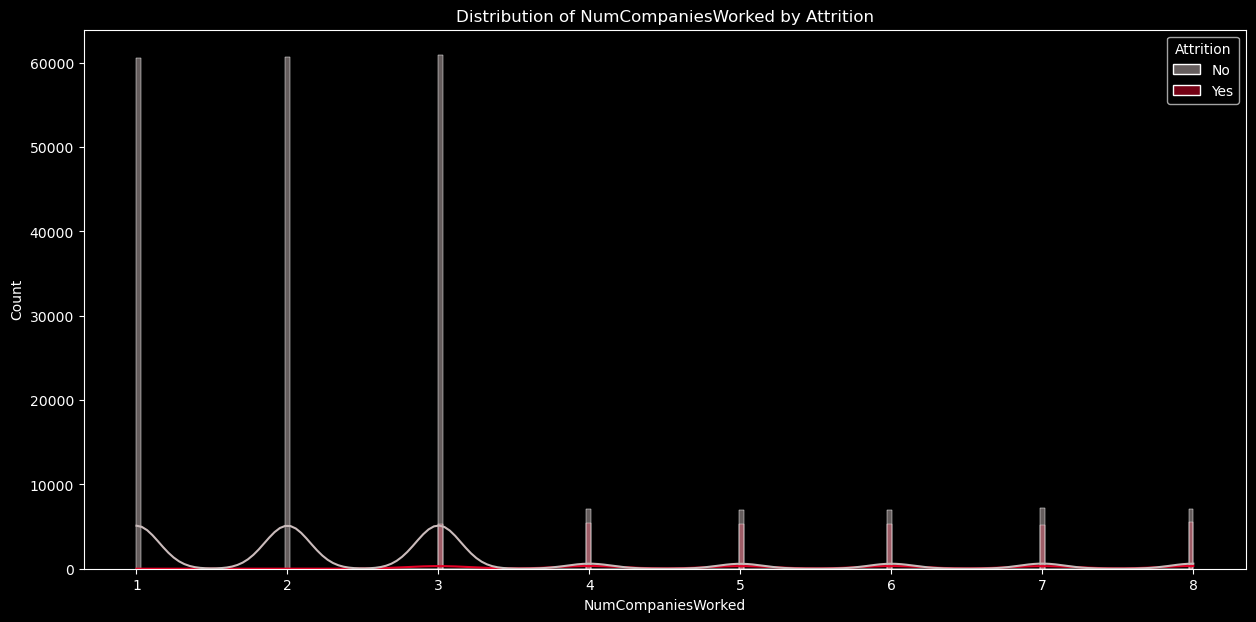

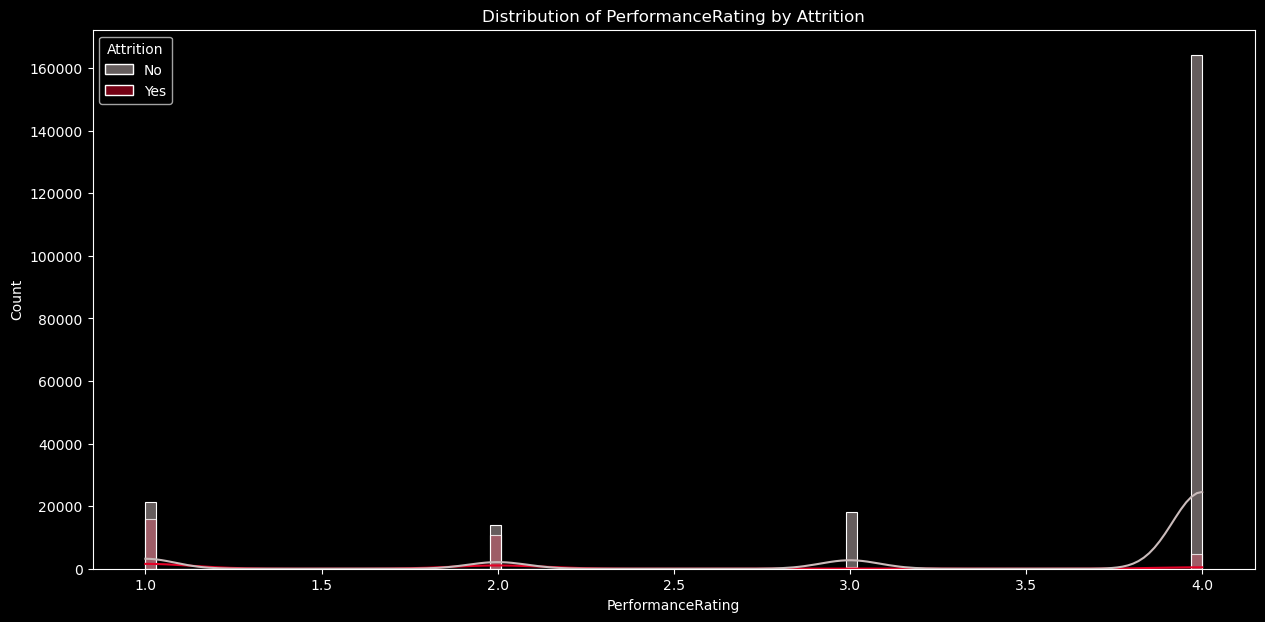

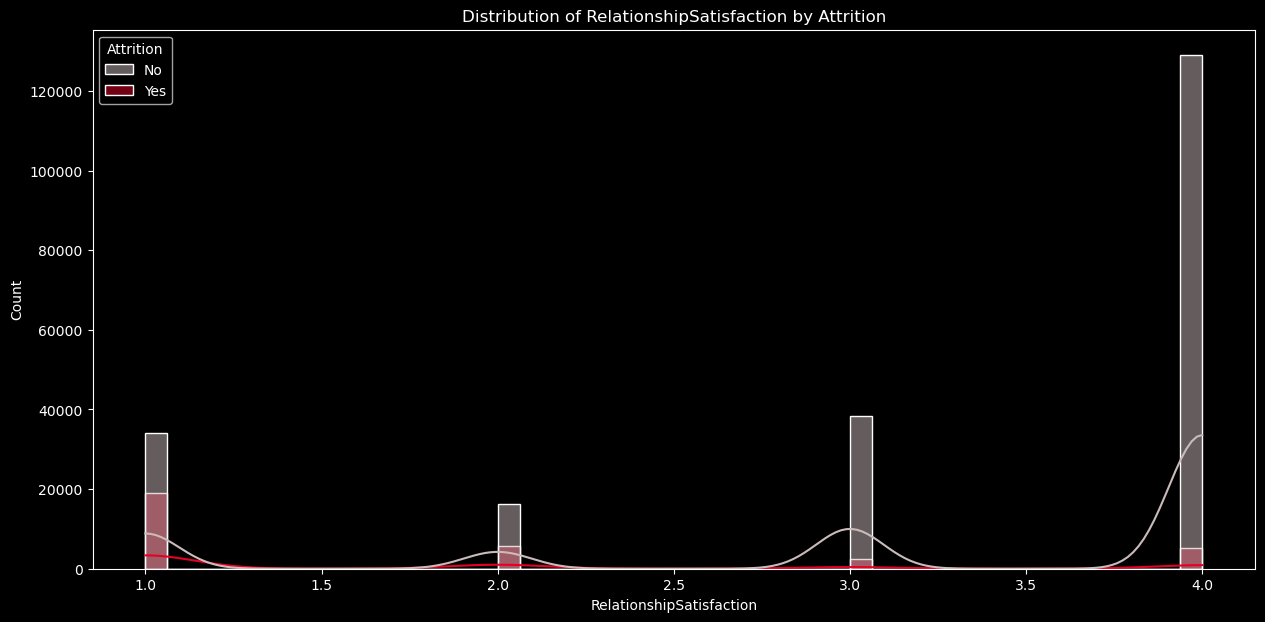

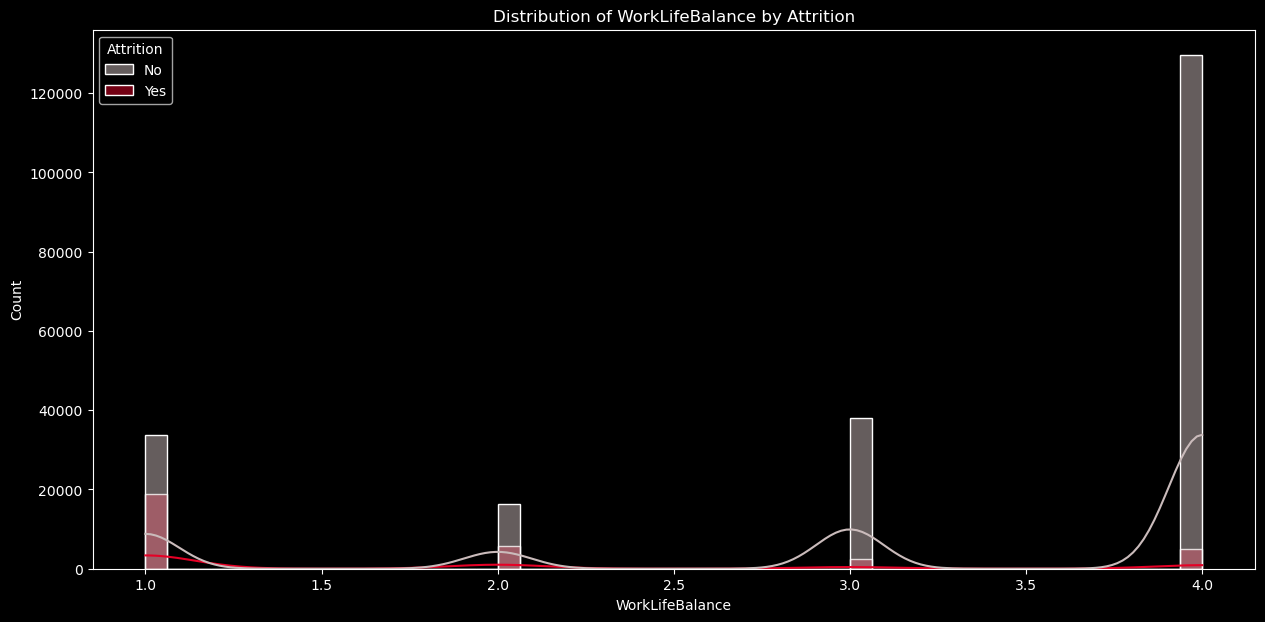

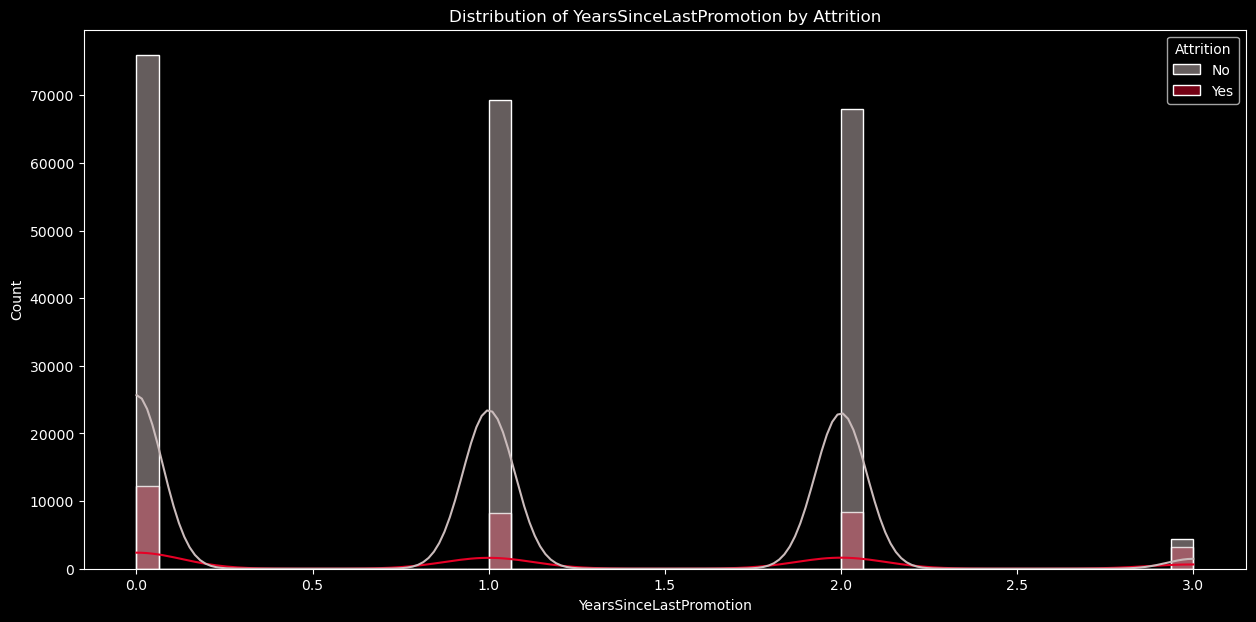

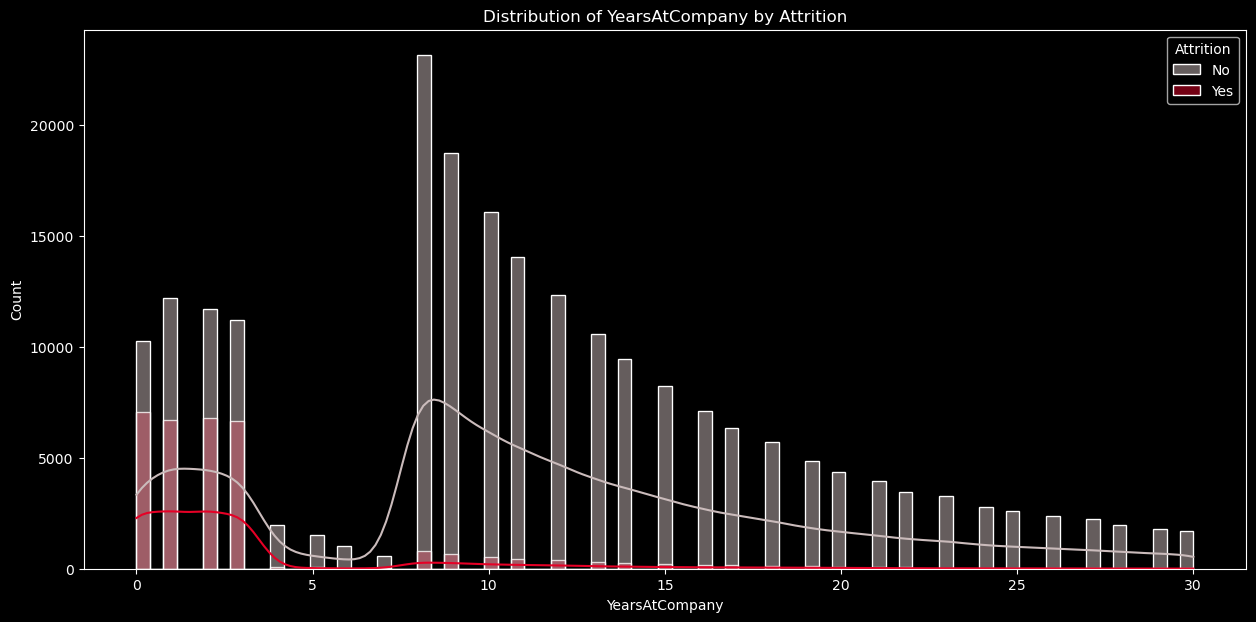

In [15]:
for col in df:
        if df[col].dtypes != 'object':
            plt.figure(figsize=(15,7))
            sns.histplot(data=df, x=col, hue= df['Attrition'], kde=True ,palette= custom_palette)
            plt.title(f'Distribution of {col} by Attrition')
            plt.show()

###  |----[ | ]----| Boxplots of Numerical Features help us detect outliers

C:\Users\Admin\AppData\Local\Temp\ipykernel_17120\560124708.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


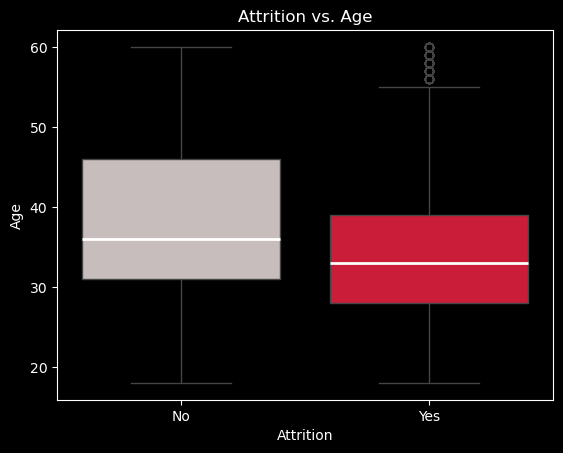

C:\Users\Admin\AppData\Local\Temp\ipykernel_17120\560124708.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


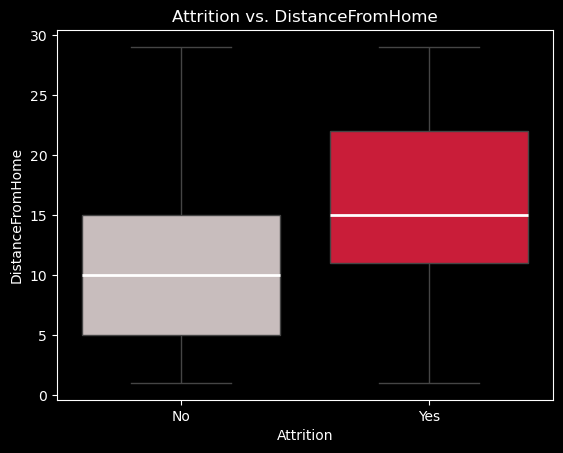

C:\Users\Admin\AppData\Local\Temp\ipykernel_17120\560124708.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


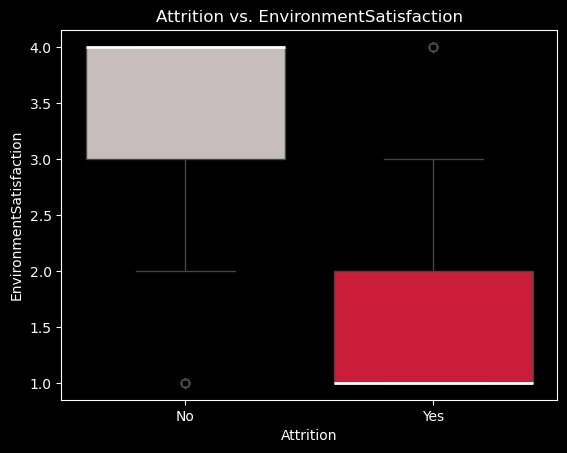

C:\Users\Admin\AppData\Local\Temp\ipykernel_17120\560124708.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


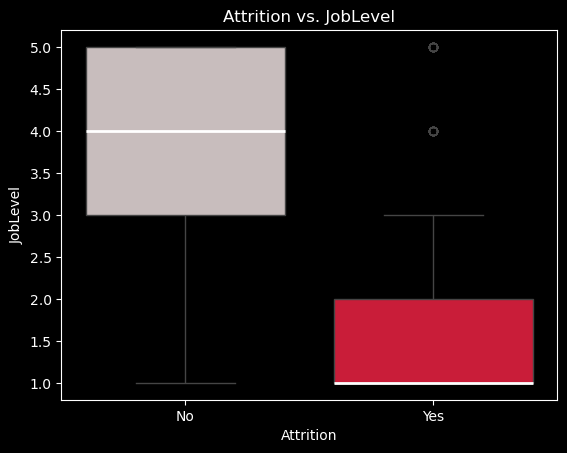

C:\Users\Admin\AppData\Local\Temp\ipykernel_17120\560124708.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


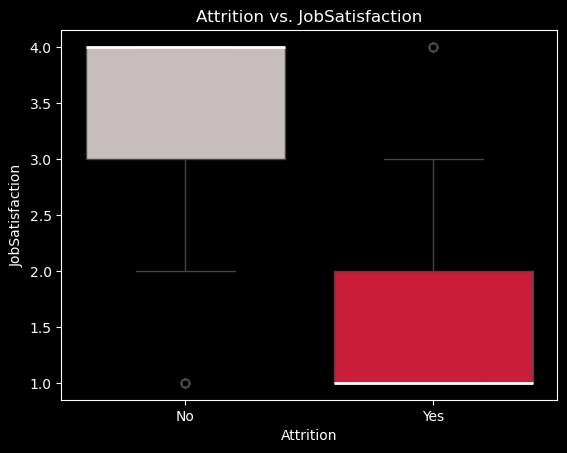

C:\Users\Admin\AppData\Local\Temp\ipykernel_17120\560124708.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


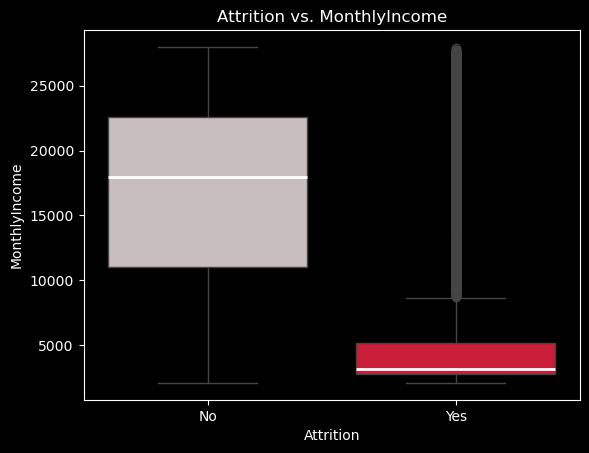

C:\Users\Admin\AppData\Local\Temp\ipykernel_17120\560124708.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


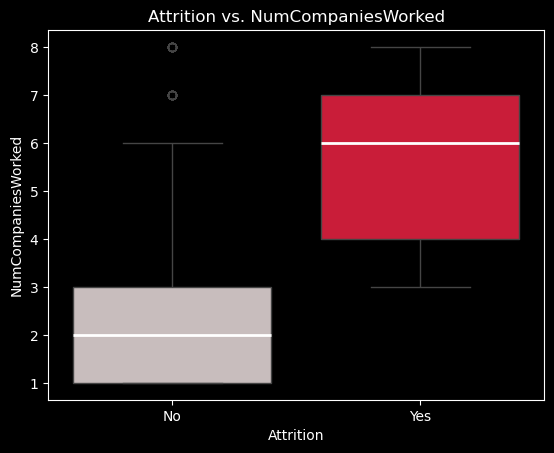

C:\Users\Admin\AppData\Local\Temp\ipykernel_17120\560124708.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


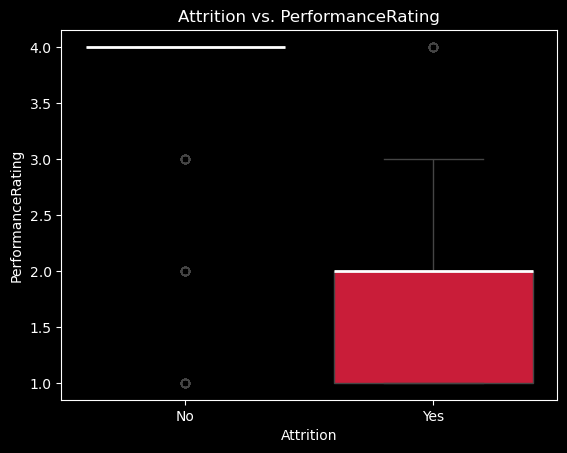

C:\Users\Admin\AppData\Local\Temp\ipykernel_17120\560124708.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


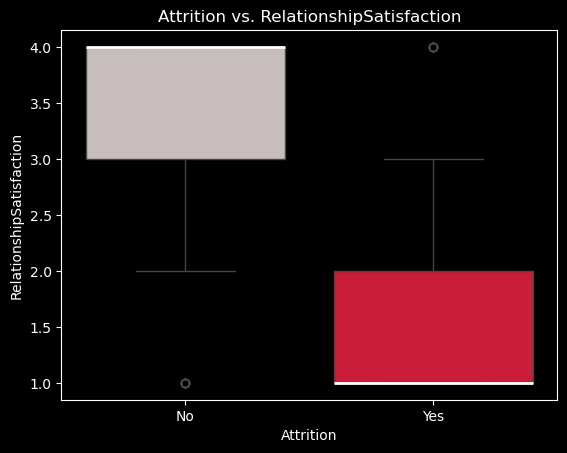

C:\Users\Admin\AppData\Local\Temp\ipykernel_17120\560124708.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


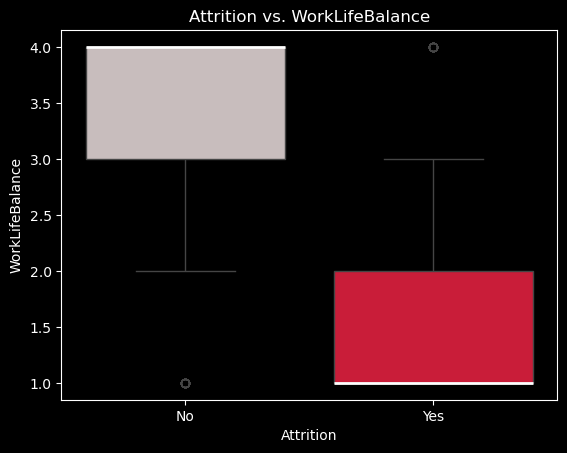

C:\Users\Admin\AppData\Local\Temp\ipykernel_17120\560124708.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


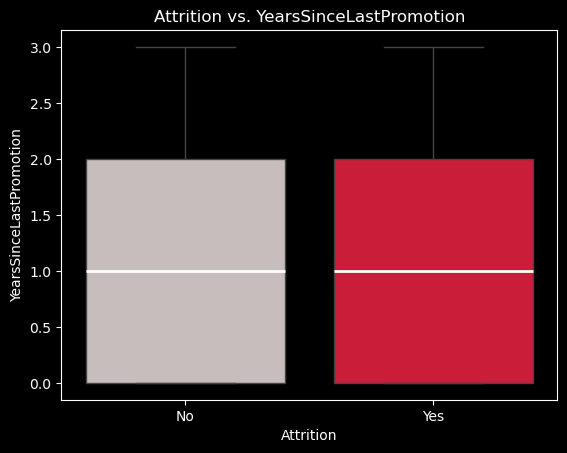

C:\Users\Admin\AppData\Local\Temp\ipykernel_17120\560124708.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


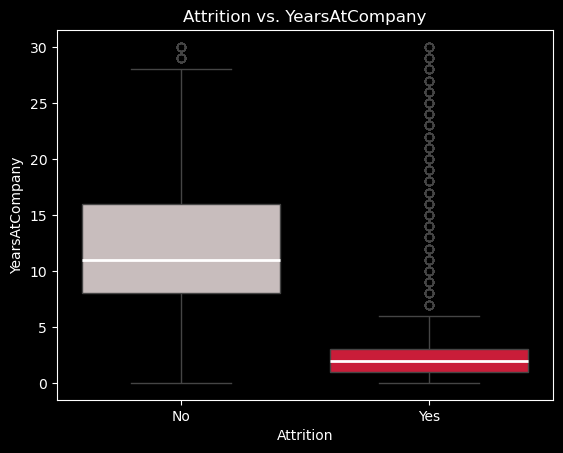

In [16]:
for col in df:
    if df[col].dtype != 'object':
        plt.figure()
        sns.boxplot(
            data=df, 
            x=df['Attrition'],
            y=col,
            medianprops={'color': 'white', 'linewidth': 2},
            palette= custom_palette
                    )
        plt.title(f'Attrition vs. {col}')
        plt.show()

### 📊 Bar charts

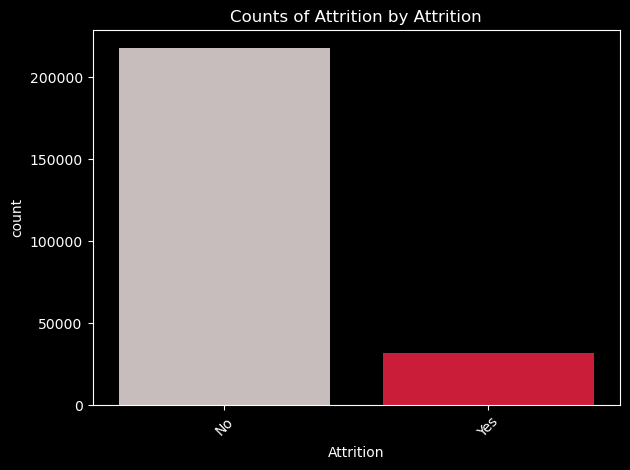

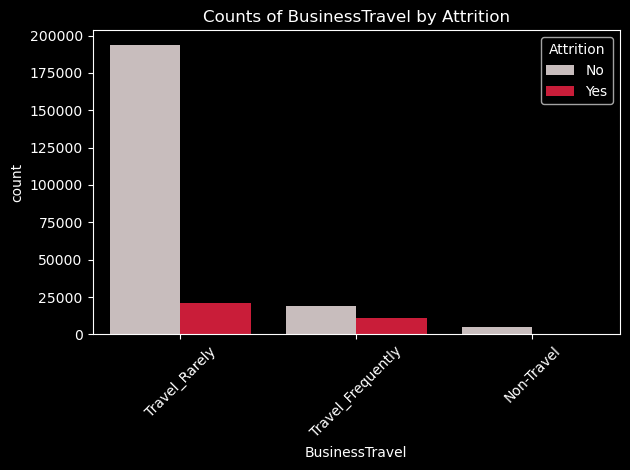

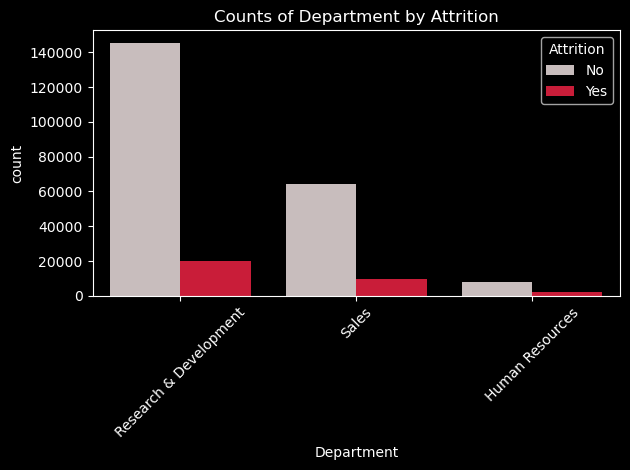

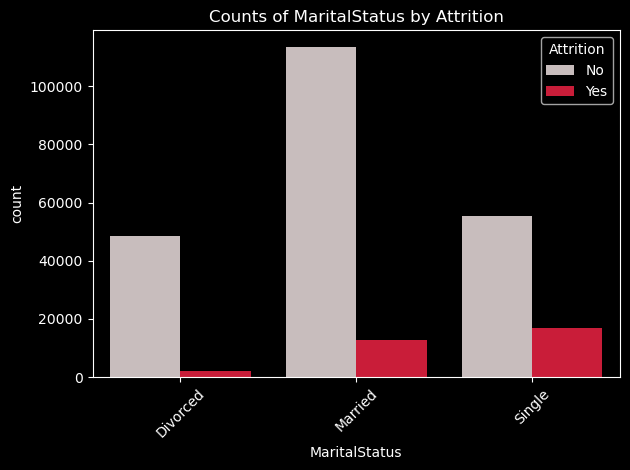

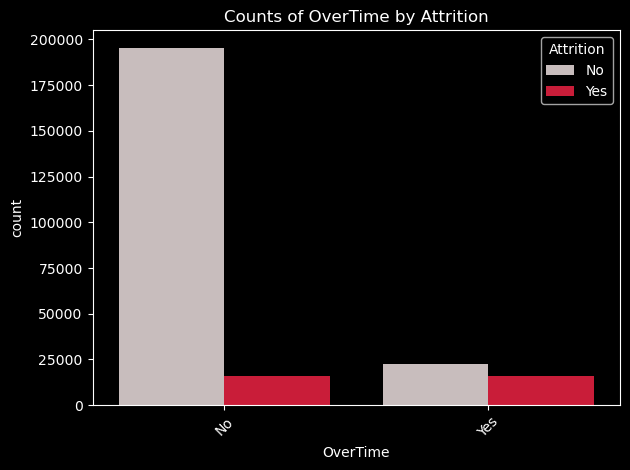

In [17]:
for col in df:
    if df[col].dtype == 'object':
        plt.figure()
        sns.countplot(
            data=df, 
            x=col, 
            hue=df['Attrition'], 
            palette=custom_palette
        ) 
        plt.title(f'Counts of {col} by Attrition')
        plt.xticks(rotation=45) 
        plt.tight_layout()
        plt.show()

## 🧪 T-test on Satisfaction Level

In [18]:
left = df[df['Attrition'] == 'Yes']['JobSatisfaction']
stay = df[df['Attrition'] == 'No']['JobSatisfaction']
t, p = ttest_ind(left, stay)
print("T-Test (JobSatisfaction vs Attrition)")
print(f"T = {t:.2f}, p = {p:.4f}")
print("Significant!" if p < 0.05 else "Not significant")
print()

T-Test (JobSatisfaction vs Attrition)
T = -210.78, p = 0.0000
Significant!



## 🧪 Chi-Square Test on OverTime

In [19]:
table = pd.crosstab(df['OverTime'], df['Attrition'])
chi2, p, dof, exp = chi2_contingency(table)
print("Chi-Squared Test (OverTime vs Attrition)")
print(f"Chi2 = {chi2:.2f}, p = {p:.4f}")
print("Significant!" if p < 0.05 else "Not significant")
print()

Chi-Squared Test (OverTime vs Attrition)
Chi2 = 32990.09, p = 0.0000
Significant!



## 🔡 ➡️ 🔢 data Encoding

In [20]:

# Binary features to map to 1/0
BINARY_MAP_COLS = {
    'Attrition': {'Yes': 1, 'No': 0},
    'Gender': {'Male': 1, 'Female': 0},
    'OverTime': {'Yes': 1, 'No': 0}
}

# Ordinal features to map to 0, 1, 2, etc.
# Note: Most ordinals (Education, JobLevel) are already numeric.
ORDINAL_MAP_COLS = {
    'BusinessTravel': {
        'Non-Travel': 0,
        'Travel_Rarely': 1,
        'Travel_Frequently': 2
    }
}

# Nominal (non-ordinal) features to one-hot encode
NOMINAL_COLS = [
    'Department',
    'MaritalStatus'
]

### Encode binary and ordinal features directly to numeric values

In [21]:
for col, mapping in ORDINAL_MAP_COLS.items():
        if col in df.columns:
            df[col] = df[col].map(mapping)
for col, mapping in BINARY_MAP_COLS.items():
        if col in df.columns:
            df[col] = df[col].map(mapping)           

C:\Users\Admin\AppData\Local\Temp\ipykernel_17120\653896309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(mapping)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17120\653896309.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(mapping)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17120\653896309.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

### One-Hot Encode nominal features

In [22]:
df = pd.get_dummies(df, columns=NOMINAL_COLS)

In [23]:
df 

,Age,Attrition,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,YearsSinceLastPromotion,YearsAtCompany,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,49,0,1,22.0,3.0,5.0,4.0,20627.0,3.0,0,4.0,4.0,4.0,0.0,21.0,False,True,False,True,False,False
1,50,0,1,8.0,3.0,3.0,4.0,11947.0,2.0,1,4.0,3.0,3.0,0.0,17.0,False,True,False,True,False,False
2,32,0,1,21.0,4.0,5.0,4.0,24026.0,3.0,1,4.0,4.0,3.0,1.0,13.0,False,True,False,False,True,False
3,38,0,1,8.0,4.0,3.0,3.0,11140.0,1.0,0,4.0,4.0,4.0,0.0,18.0,False,False,True,True,False,False
4,28,1,2,27.0,1.0,1.0,1.0,3034.0,8.0,1,1.0,1.0,1.0,1.0,1.0,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249632,30,0,1,14.0,3.0,4.0,4.0,16144.0,3.0,1,4.0,4.0,4.0,2.0,9.0,False,True,False,False,False,True
249633,40,0,1,8.0,4.0,5.0,1.0,21604.0,2.0,0,3.0,4.0,4.0,2.0,18.0,False,True,False,False,True,False
249634,31,0,1,22.0,4.0,3.0,4.0,11428.0,2.0,0,3.0,4.0,4.0,0.0,10.0,False,True,False,False,True,False
249635,33,0,1,1.0,1.0,1.0,1.0,2836.0,8.0,0,2.0,1.0,1.0,1.0,1.0,False,True,False,False,False,True


In [24]:
encoder_data = {
    "binary_maps": BINARY_MAP_COLS,
    "ordinal_maps": ORDINAL_MAP_COLS,
    "nominal_cols": NOMINAL_COLS
}

## 🔥📈 Heat map

In [25]:
df_continuous = df.select_dtypes(include=['int64', 'float64'])

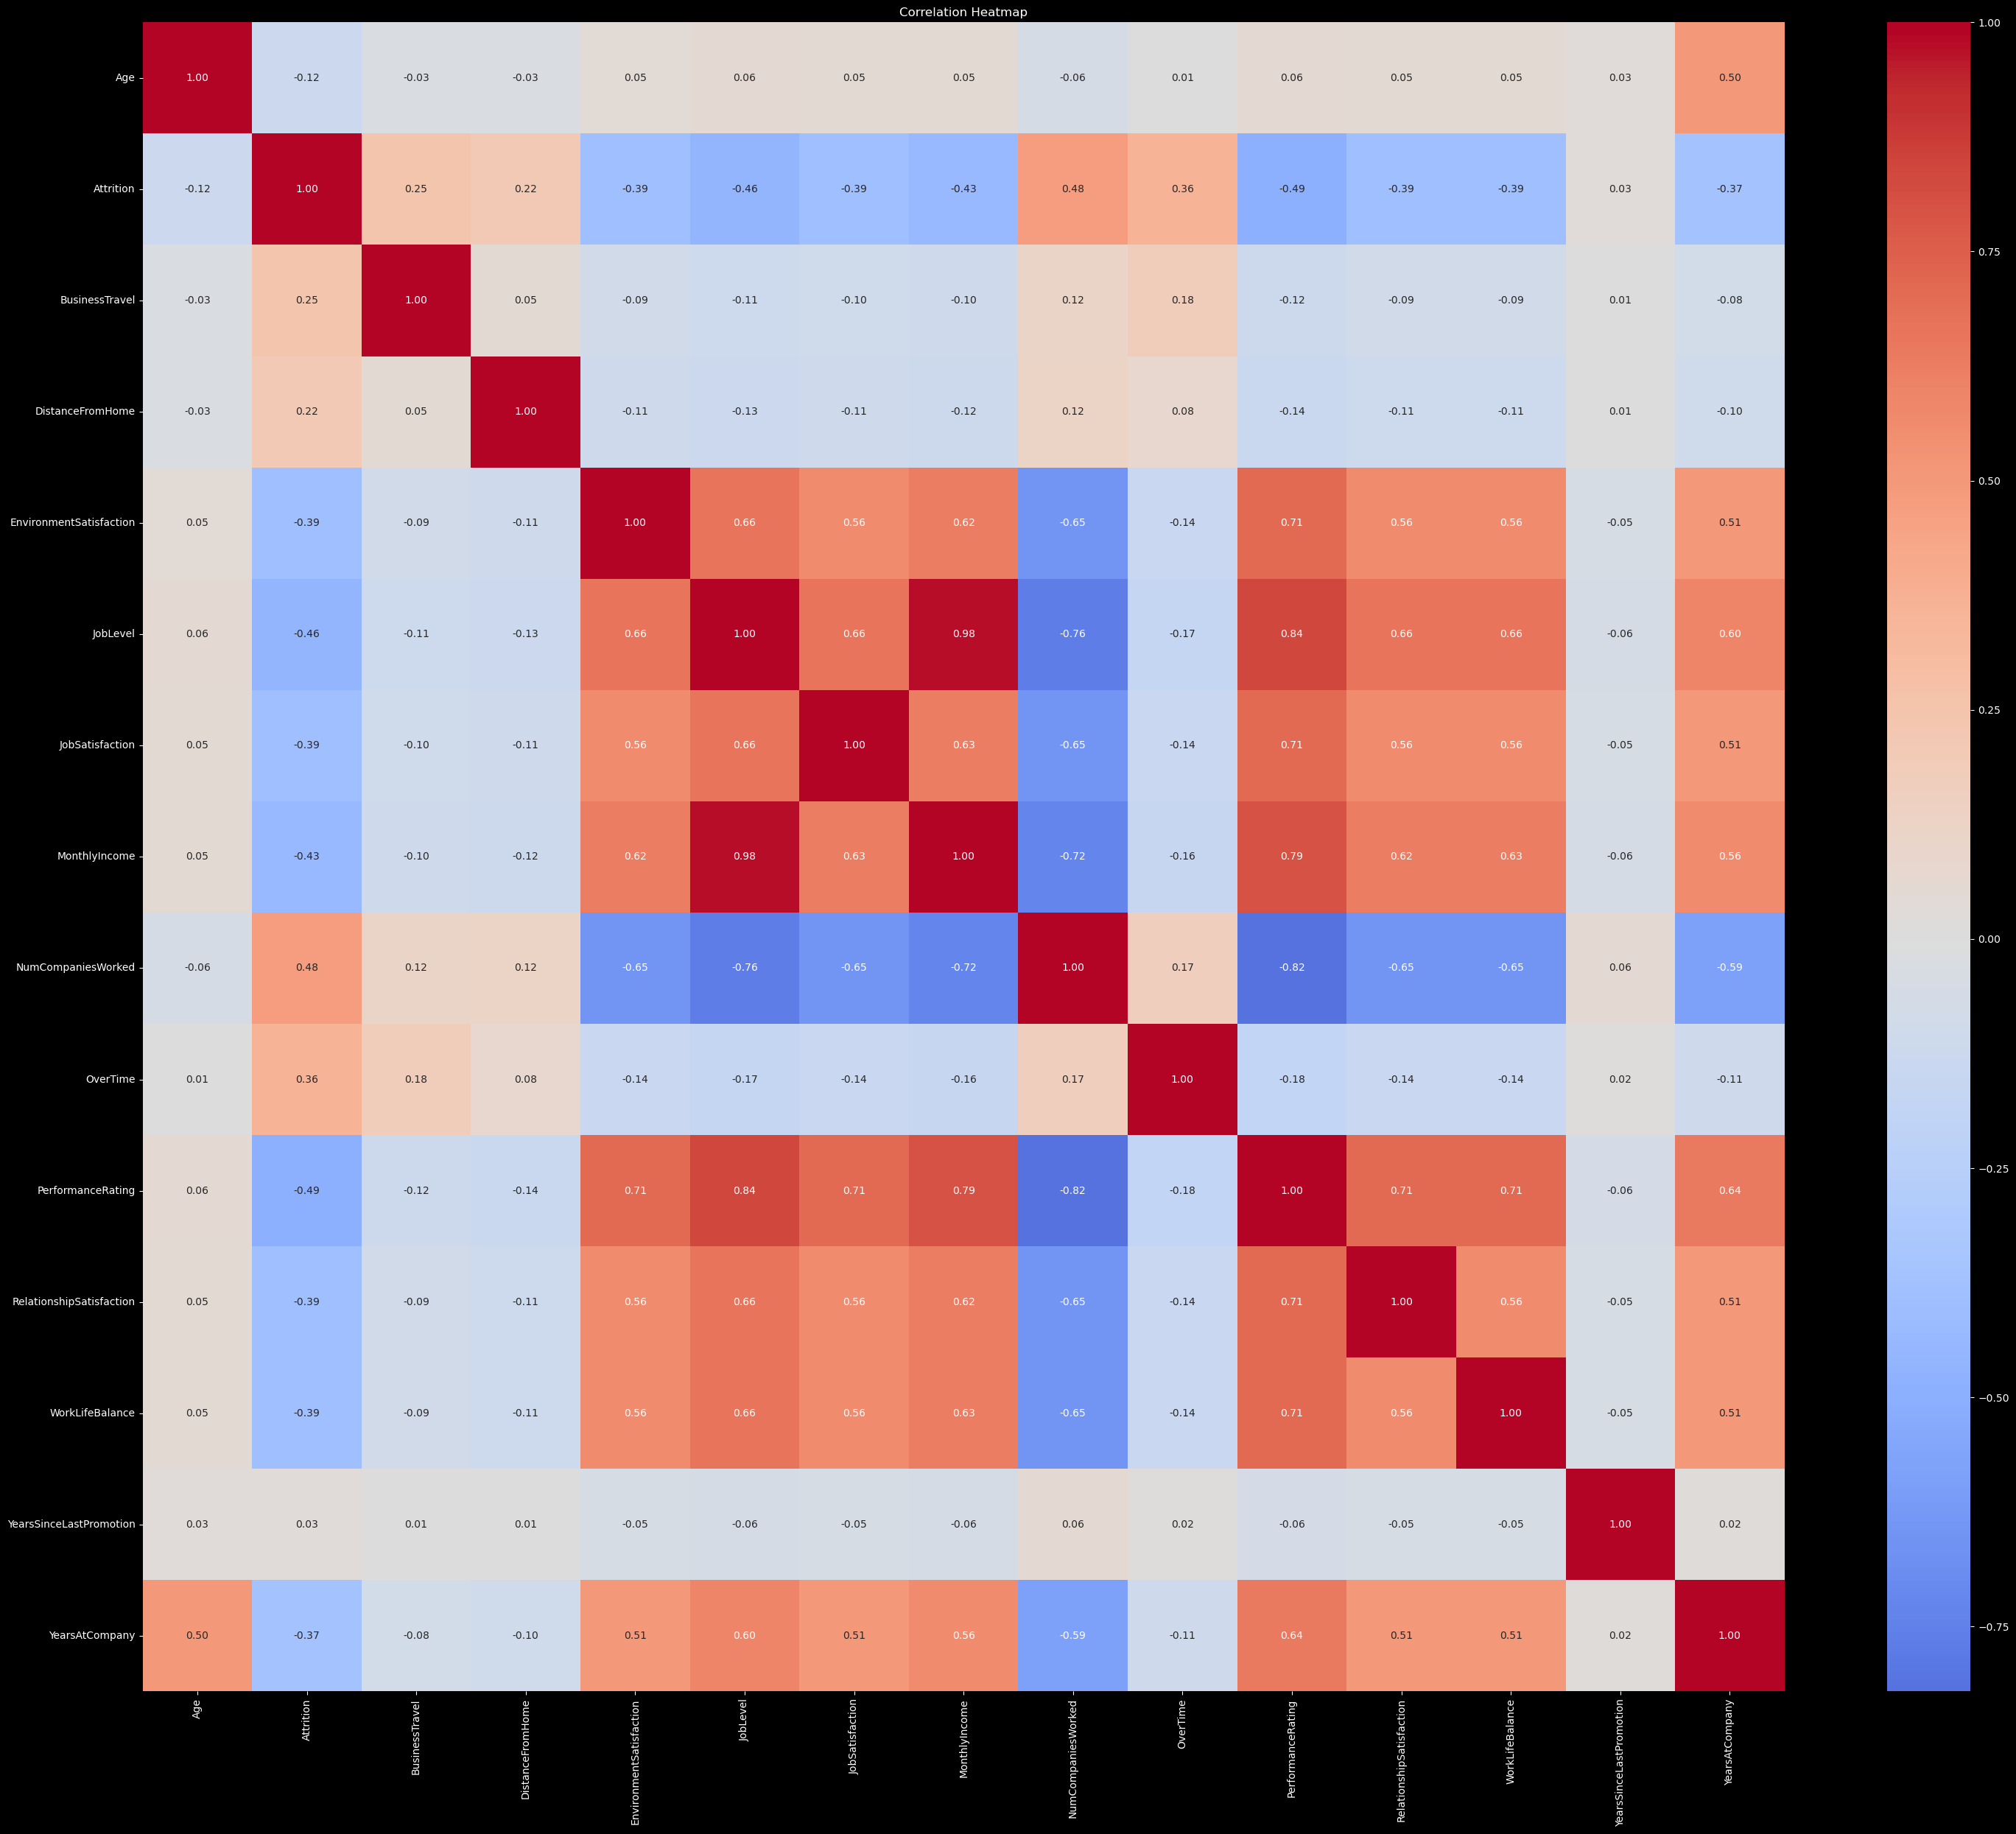

In [26]:
plt.figure(figsize=(30, 25))
correlation_matrix = df_continuous.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

##  🔨💡 Feature Engineering & dropping

In [27]:
df_feature_engineered = df.copy()

### 📐👷 hand crafted features

In [28]:
# promotions
df_feature_engineered['PromotionLethargy'] = (df_feature_engineered['YearsAtCompany'] - df_feature_engineered['YearsSinceLastPromotion']) / (df_feature_engineered['YearsAtCompany'] + 1)
# distance features
df_feature_engineered['HighDistanceLowPay'] = df_feature_engineered['DistanceFromHome'] / df_feature_engineered['MonthlyIncome']

df_feature_engineered['WorkLifeCommuteStrain'] = df_feature_engineered['DistanceFromHome'] / df_feature_engineered['WorkLifeBalance']

#  satisfaction_cols
satisfaction_cols = ['EnvironmentSatisfaction', 'JobSatisfaction', 
                     'RelationshipSatisfaction']
df_feature_engineered['OverallHappinessScore'] = df_feature_engineered[satisfaction_cols].mean(axis=1) 

### 🗑 drop redundant or useless noisey features   

In [29]:
df_feature_engineered.drop(columns=['YearsSinceLastPromotion','YearsAtCompany','WorkLifeBalance'], inplace=True)
df_feature_engineered.drop(['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction'], axis= 1, inplace= True)

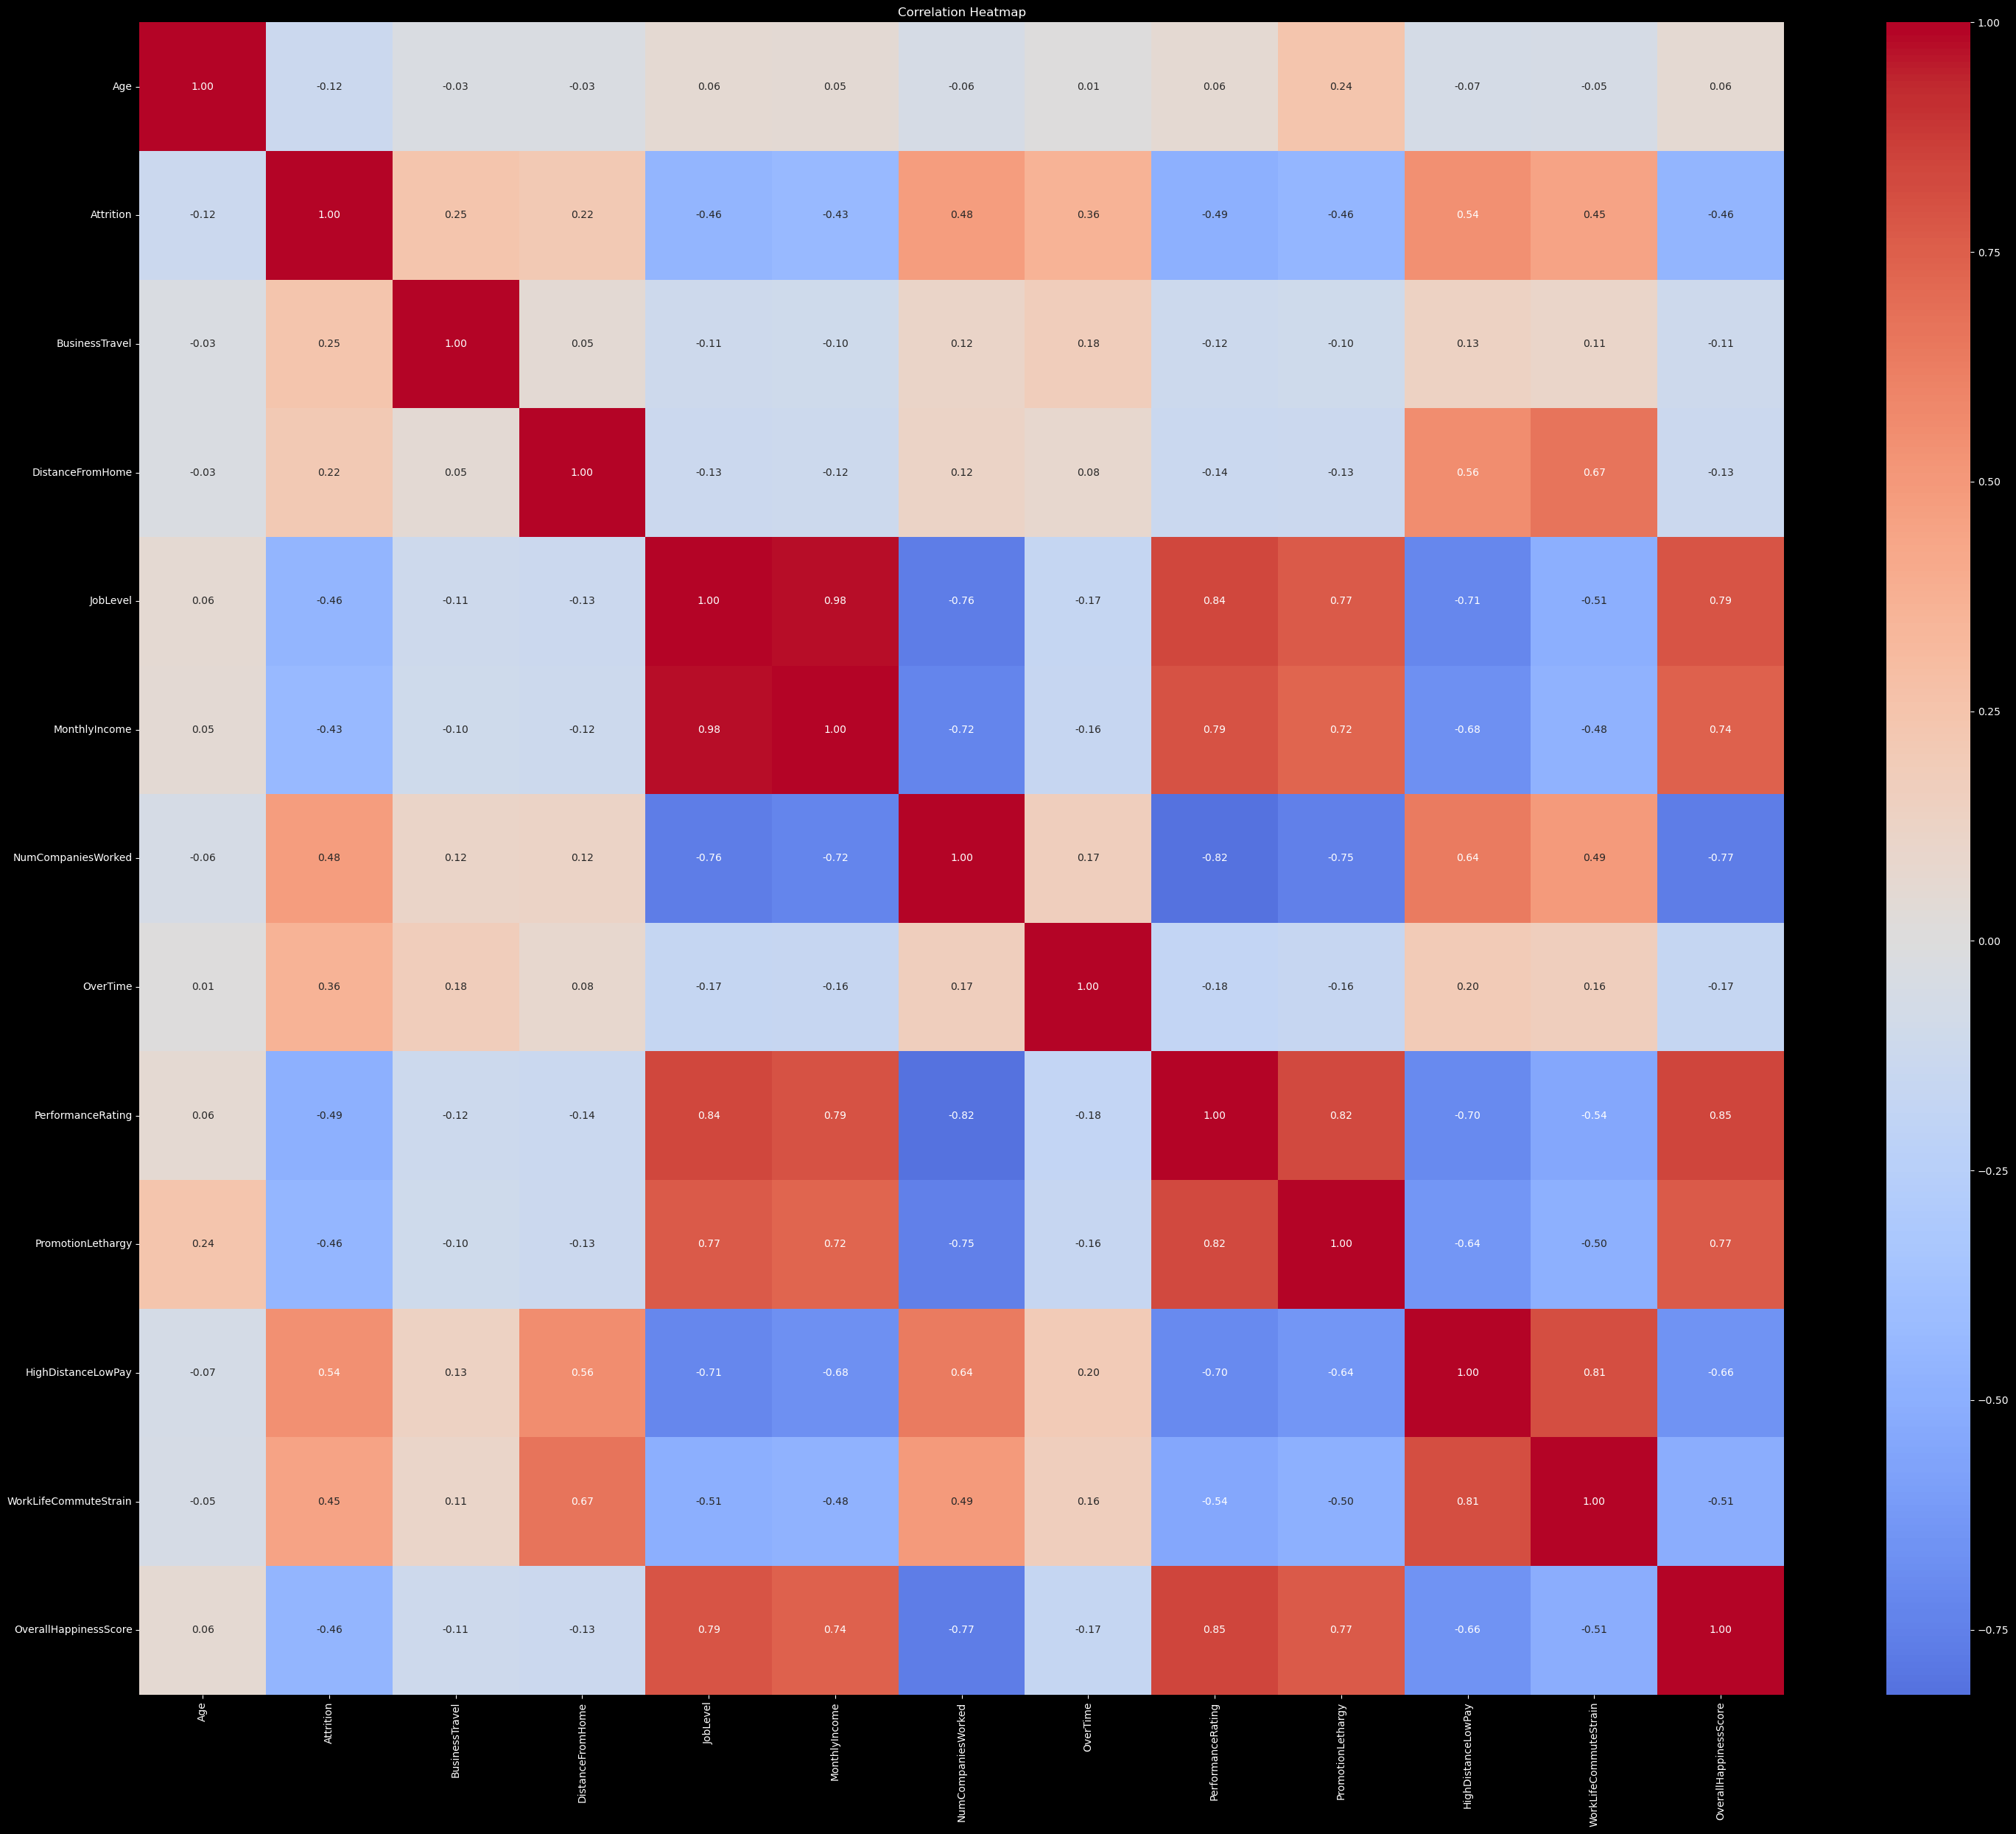

In [30]:
df_feature_engineered_continuous = df_feature_engineered.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(30, 25))
correlation_matrix = df_feature_engineered_continuous.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [31]:
df_feature_engineered

,Age,Attrition,BusinessTravel,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PromotionLethargy,HighDistanceLowPay,WorkLifeCommuteStrain,OverallHappinessScore
0,49,0,1,22.0,5.0,20627.0,3.0,0,4.0,False,True,False,True,False,False,0.954545,0.001067,5.500000,3.666667
1,50,0,1,8.0,3.0,11947.0,2.0,1,4.0,False,True,False,True,False,False,0.944444,0.000670,2.666667,3.333333
2,32,0,1,21.0,5.0,24026.0,3.0,1,4.0,False,True,False,False,True,False,0.857143,0.000874,7.000000,4.000000
3,38,0,1,8.0,3.0,11140.0,1.0,0,4.0,False,False,True,True,False,False,0.947368,0.000718,2.000000,3.666667
4,28,1,2,27.0,1.0,3034.0,8.0,1,1.0,False,False,True,False,False,True,0.000000,0.008899,27.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249632,30,0,1,14.0,4.0,16144.0,3.0,1,4.0,False,True,False,False,False,True,0.700000,0.000867,3.500000,3.666667
249633,40,0,1,8.0,5.0,21604.0,2.0,0,3.0,False,True,False,False,True,False,0.842105,0.000370,2.000000,3.000000
249634,31,0,1,22.0,3.0,11428.0,2.0,0,3.0,False,True,False,False,True,False,0.909091,0.001925,5.500000,4.000000
249635,33,0,1,1.0,1.0,2836.0,8.0,0,2.0,False,True,False,False,False,True,0.000000,0.000353,1.000000,1.000000


In [34]:
#df.to_csv('Full_Employee_Data_preprocessed.csv', index=0)
df_feature_engineered.to_csv('Full_Employee_Data_feature_engineered.csv',index=0)
